<a href="https://colab.research.google.com/github/Ali-Alameer/NLP/blob/main/week10_topic_modelling_NMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [55]:
# Data processing
import pandas as pd
import numpy as np
# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset read and visualise 

In [56]:
#from io import BytesIO
#from zipfile import ZipFile
#import urllib.request
    
#url = urllib.request.urlopen("https://github.com/Ali-Alameer/NLP/raw/main/data/NIPS%20Papers.zip")

#with ZipFile(BytesIO(url.read())) as my_zip_file:
   # temp = my_zip_file.open('NIPS Papers/papers.csv')

papers_nips = pd.read_csv("scopus.csv")

# Print head
papers_nips.head()

,Authors,Author full names,Author(s) ID,Title,Year,Link,Abstract
0,Chae B.; Park Y.-M.; Lee S.-J.; Lee J.-S.; Kan...,"Chae, Boram (57315923900); Park, Young-Min (56...",57315923900; 56245805400; 55262324300; 5610788...,The Impact of Melatonin on Inflammatory Status...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Objective: This study aimed to assess whether ...
1,Hughes J.,"Hughes, Jennifer (57210218596)",57210218596,Pharmacokinetics and Safety of Group A and B A...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Recommendations for treatment of rifampicin-re...
2,Palmer R.F.; Dempsey T.T.; Afrin L.B.,"Palmer, Raymond F. (7402726982); Dempsey, Tani...",7402726982; 57208421590; 6602167168,Chemical Intolerance and Mast Cell Activation:...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Background: Chemical Intolerance (CI) is chara...
3,Jin X.; Wang Y.; Huang C.; Luo X.; Gao X.; She...,"Jin, Xingyue (57221405916); Wang, Yuxin (58768...",57221405916; 58768327700; 57216579345; 8511702...,The association between childhood maltreatment...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Background Childhood maltreatment is associate...
4,Park Y.-M.; Lee S.-J.; Lee J.-S.; Na K.-S.; Ka...,"Park, Young-Min (56245805400); Lee, So-Jin (55...",56245805400; 55262324300; 56107882900; 1451976...,Efficacy of Prolonged-Release Melatonin Admini...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,"Objective: Melatonin, both immediate and prolo..."


In [57]:
papers_nips.head()

,Authors,Author full names,Author(s) ID,Title,Year,Link,Abstract
0,Chae B.; Park Y.-M.; Lee S.-J.; Lee J.-S.; Kan...,"Chae, Boram (57315923900); Park, Young-Min (56...",57315923900; 56245805400; 55262324300; 5610788...,The Impact of Melatonin on Inflammatory Status...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Objective: This study aimed to assess whether ...
1,Hughes J.,"Hughes, Jennifer (57210218596)",57210218596,Pharmacokinetics and Safety of Group A and B A...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Recommendations for treatment of rifampicin-re...
2,Palmer R.F.; Dempsey T.T.; Afrin L.B.,"Palmer, Raymond F. (7402726982); Dempsey, Tani...",7402726982; 57208421590; 6602167168,Chemical Intolerance and Mast Cell Activation:...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Background: Chemical Intolerance (CI) is chara...
3,Jin X.; Wang Y.; Huang C.; Luo X.; Gao X.; She...,"Jin, Xingyue (57221405916); Wang, Yuxin (58768...",57221405916; 58768327700; 57216579345; 8511702...,The association between childhood maltreatment...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Background Childhood maltreatment is associate...
4,Park Y.-M.; Lee S.-J.; Lee J.-S.; Na K.-S.; Ka...,"Park, Young-Min (56245805400); Lee, So-Jin (55...",56245805400; 55262324300; 56107882900; 1451976...,Efficacy of Prolonged-Release Melatonin Admini...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,"Objective: Melatonin, both immediate and prolo..."


In [58]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

There are 179 default stopwords. They are ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

In [62]:
import pandas as pd

# Replace NaN with empty string in 'Title' column
papers_nips['Title'] = papers_nips['Title'].fillna('')

# Remove stopwords
papers_nips['abstract_without_stopwords'] = papers_nips['Title'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))

# Lemmatization (assuming you have defined 'wn' for WordNetLemmatizer)
papers_nips['abstract_lemmatized'] = papers_nips['abstract_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))

# Take a look at the data
papers_nips.head()


,Authors,Author full names,Author(s) ID,Title,Year,Link,Abstract,abstract_without_stopwords,abstract_lemmatized
0,Chae B.; Park Y.-M.; Lee S.-J.; Lee J.-S.; Kan...,"Chae, Boram (57315923900); Park, Young-Min (56...",57315923900; 56245805400; 55262324300; 5610788...,The Impact of Melatonin on Inflammatory Status...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Objective: This study aimed to assess whether ...,Impact Melatonin Inflammatory Status Quality Life,Impact Melatonin Inflammatory Status Quality Life
1,Hughes J.,"Hughes, Jennifer (57210218596)",57210218596,Pharmacokinetics and Safety of Group A and B A...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Recommendations for treatment of rifampicin-re...,Pharmacokinetics Safety Group B Anti-Tuberculo...,Pharmacokinetics Safety Group B Anti-Tuberculo...
2,Palmer R.F.; Dempsey T.T.; Afrin L.B.,"Palmer, Raymond F. (7402726982); Dempsey, Tani...",7402726982; 57208421590; 6602167168,Chemical Intolerance and Mast Cell Activation:...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Background: Chemical Intolerance (CI) is chara...,Chemical Intolerance Mast Cell Activation: Sus...,Chemical Intolerance Mast Cell Activation: Sus...
3,Jin X.; Wang Y.; Huang C.; Luo X.; Gao X.; She...,"Jin, Xingyue (57221405916); Wang, Yuxin (58768...",57221405916; 58768327700; 57216579345; 8511702...,The association between childhood maltreatment...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Background Childhood maltreatment is associate...,association childhood maltreatment internet ad...,association childhood maltreatment internet ad...
4,Park Y.-M.; Lee S.-J.; Lee J.-S.; Na K.-S.; Ka...,"Park, Young-Min (56245805400); Lee, So-Jin (55...",56245805400; 55262324300; 56107882900; 1451976...,Efficacy of Prolonged-Release Melatonin Admini...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,"Objective: Melatonin, both immediate and prolo...",Efficacy Prolonged-Release Melatonin Administr...,Efficacy Prolonged-Release Melatonin Administr...


In [63]:
import pandas as pd

# Drop rows with NaN values in 'Title' column
papers_nips = papers_nips.dropna(subset=['Title'])

# Remove stopwords
papers_nips['abstract_without_stopwords'] = papers_nips['Title'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))

# Lemmatization (assuming you have defined 'wn' for WordNetLemmatizer)
papers_nips['abstract_lemmatized'] = papers_nips['abstract_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))

# Take a look at the data
papers_nips.head()


,Authors,Author full names,Author(s) ID,Title,Year,Link,Abstract,abstract_without_stopwords,abstract_lemmatized
0,Chae B.; Park Y.-M.; Lee S.-J.; Lee J.-S.; Kan...,"Chae, Boram (57315923900); Park, Young-Min (56...",57315923900; 56245805400; 55262324300; 5610788...,The Impact of Melatonin on Inflammatory Status...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Objective: This study aimed to assess whether ...,Impact Melatonin Inflammatory Status Quality Life,Impact Melatonin Inflammatory Status Quality Life
1,Hughes J.,"Hughes, Jennifer (57210218596)",57210218596,Pharmacokinetics and Safety of Group A and B A...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Recommendations for treatment of rifampicin-re...,Pharmacokinetics Safety Group B Anti-Tuberculo...,Pharmacokinetics Safety Group B Anti-Tuberculo...
2,Palmer R.F.; Dempsey T.T.; Afrin L.B.,"Palmer, Raymond F. (7402726982); Dempsey, Tani...",7402726982; 57208421590; 6602167168,Chemical Intolerance and Mast Cell Activation:...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Background: Chemical Intolerance (CI) is chara...,Chemical Intolerance Mast Cell Activation: Sus...,Chemical Intolerance Mast Cell Activation: Sus...
3,Jin X.; Wang Y.; Huang C.; Luo X.; Gao X.; She...,"Jin, Xingyue (57221405916); Wang, Yuxin (58768...",57221405916; 58768327700; 57216579345; 8511702...,The association between childhood maltreatment...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,Background Childhood maltreatment is associate...,association childhood maltreatment internet ad...,association childhood maltreatment internet ad...
4,Park Y.-M.; Lee S.-J.; Lee J.-S.; Na K.-S.; Ka...,"Park, Young-Min (56245805400); Lee, So-Jin (55...",56245805400; 55262324300; 56107882900; 1451976...,Efficacy of Prolonged-Release Melatonin Admini...,2023.0,https://www.scopus.com/inward/record.uri?eid=2...,"Objective: Melatonin, both immediate and prolo...",Efficacy Prolonged-Release Melatonin Administr...,Efficacy Prolonged-Release Melatonin Administr...


Parameters selection

In [71]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"

In [72]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [73]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(papers_nips['abstract_without_stopwords'])

Extracting tf-idf features for NMF...


In [74]:
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tf = tf_vectorizer.fit_transform(papers_nips['abstract_lemmatized'])

Extracting tf features for LDA...


Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=200 and n_features=1000...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


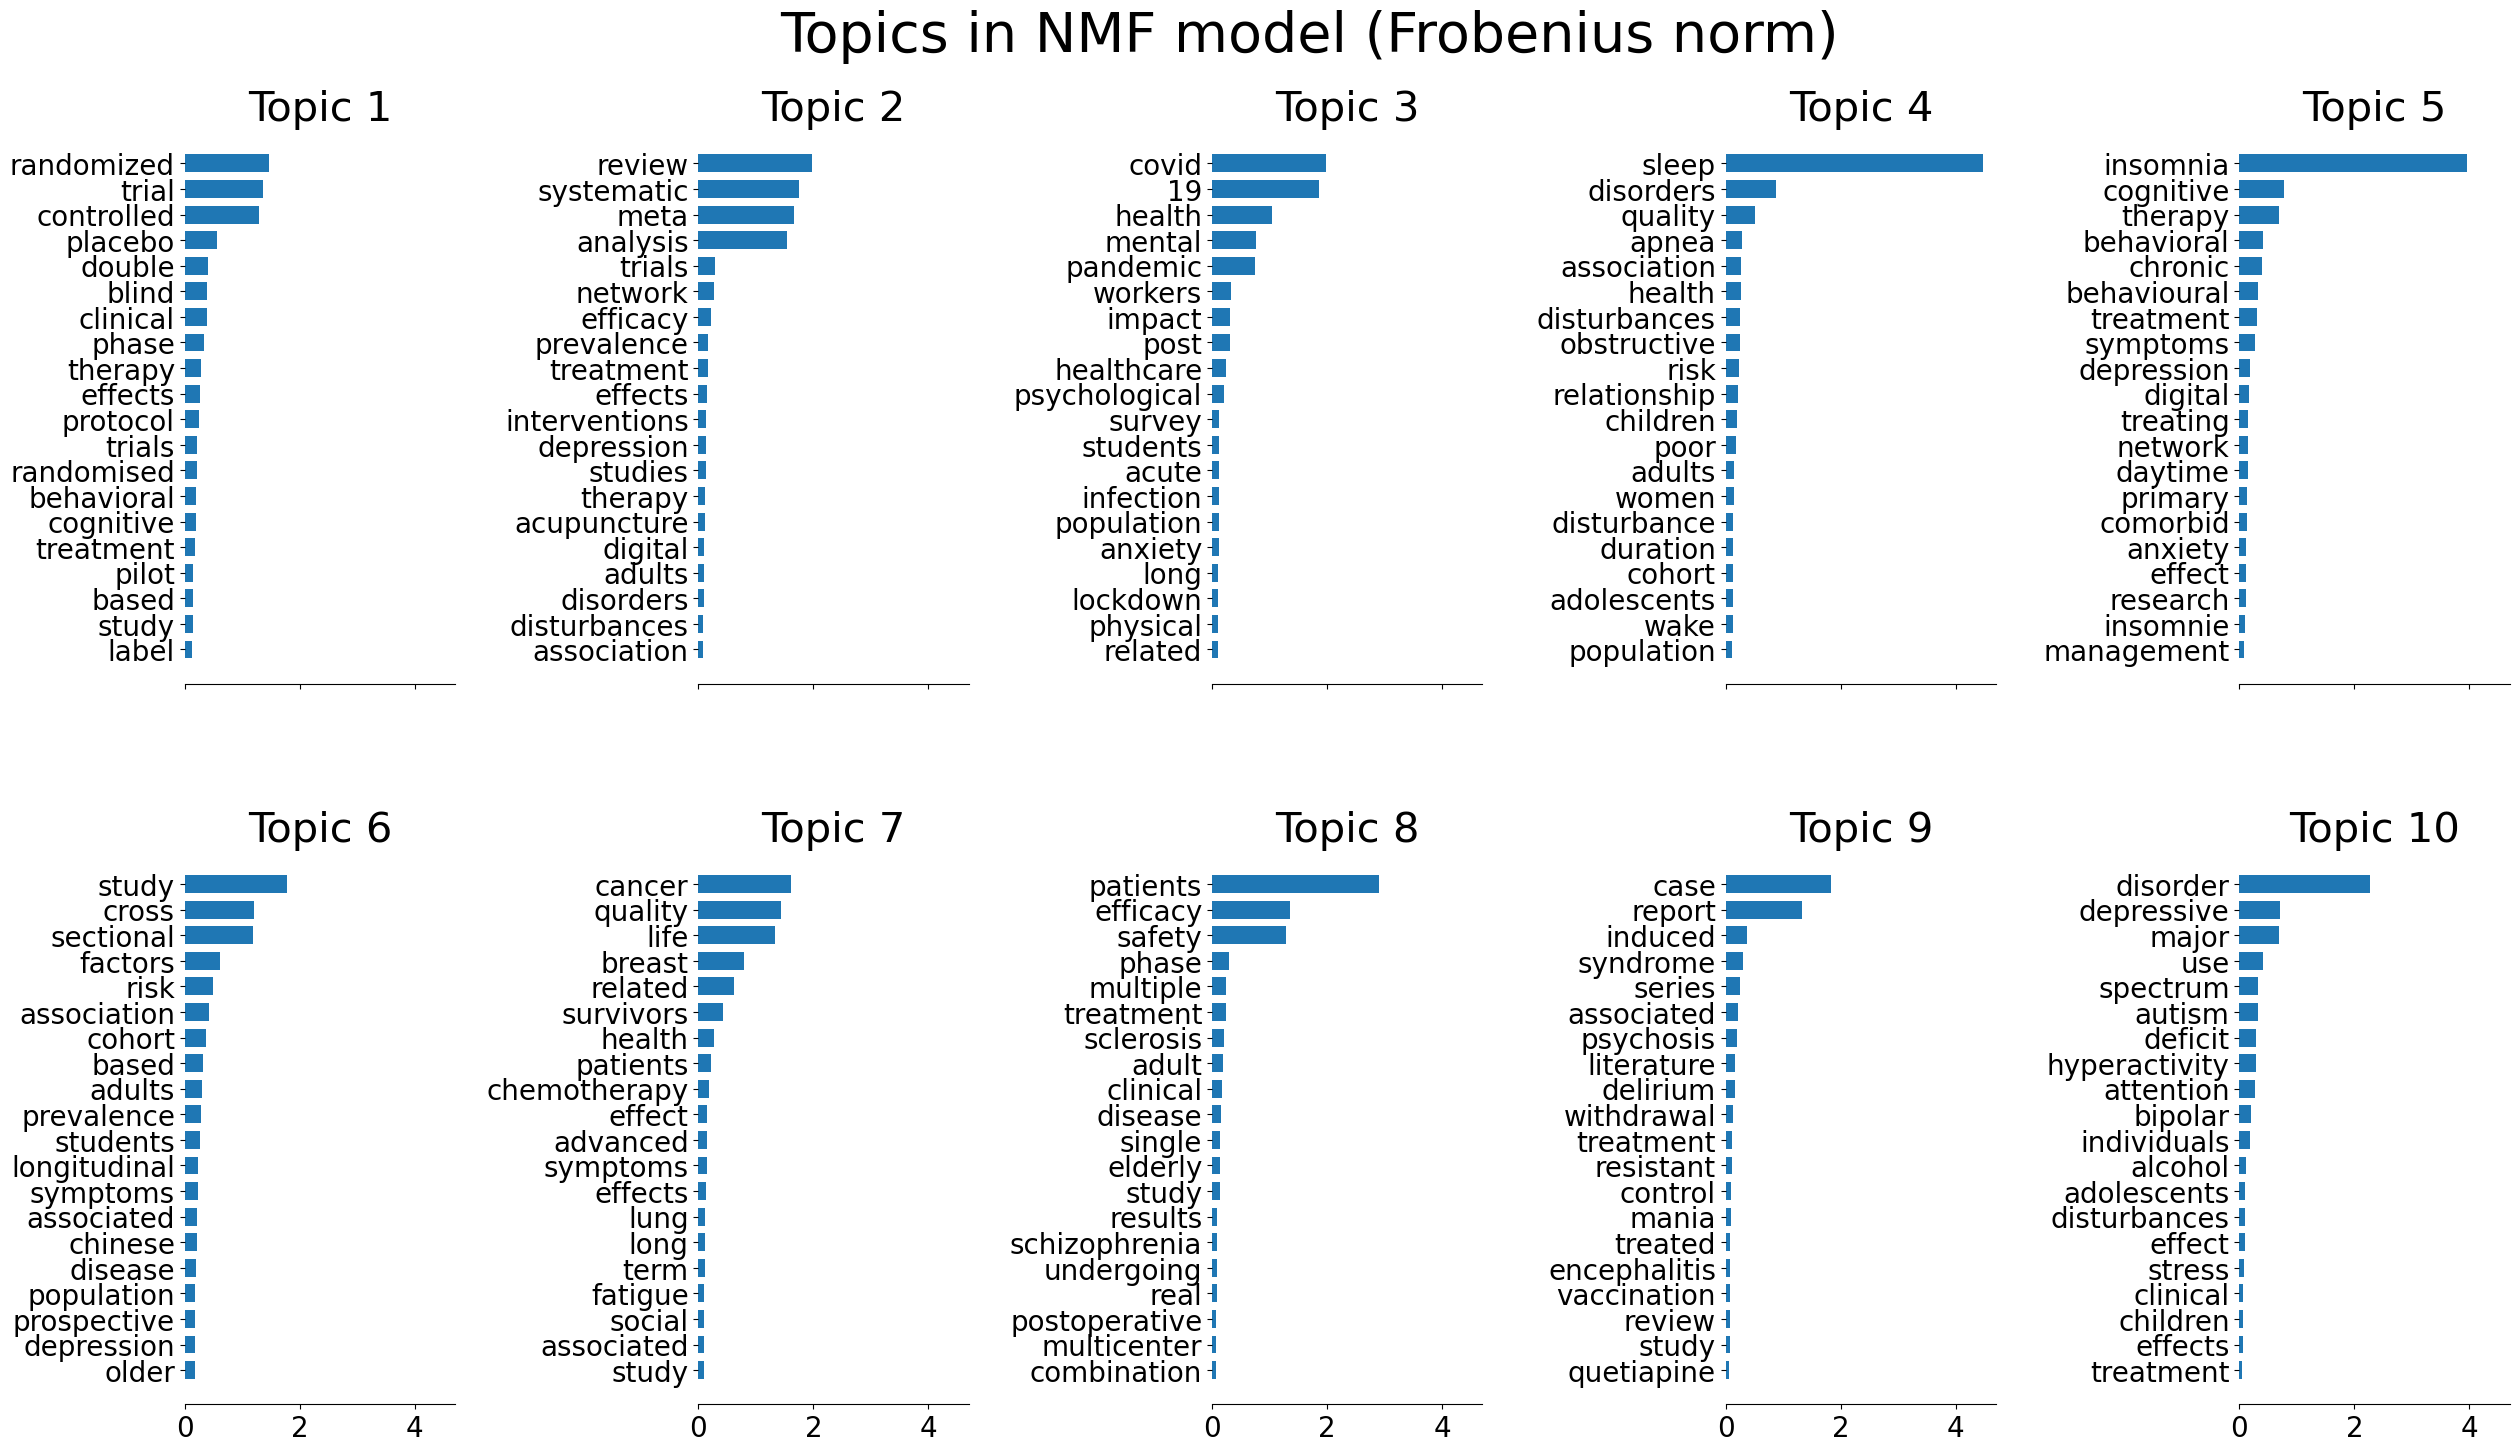

In [68]:
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


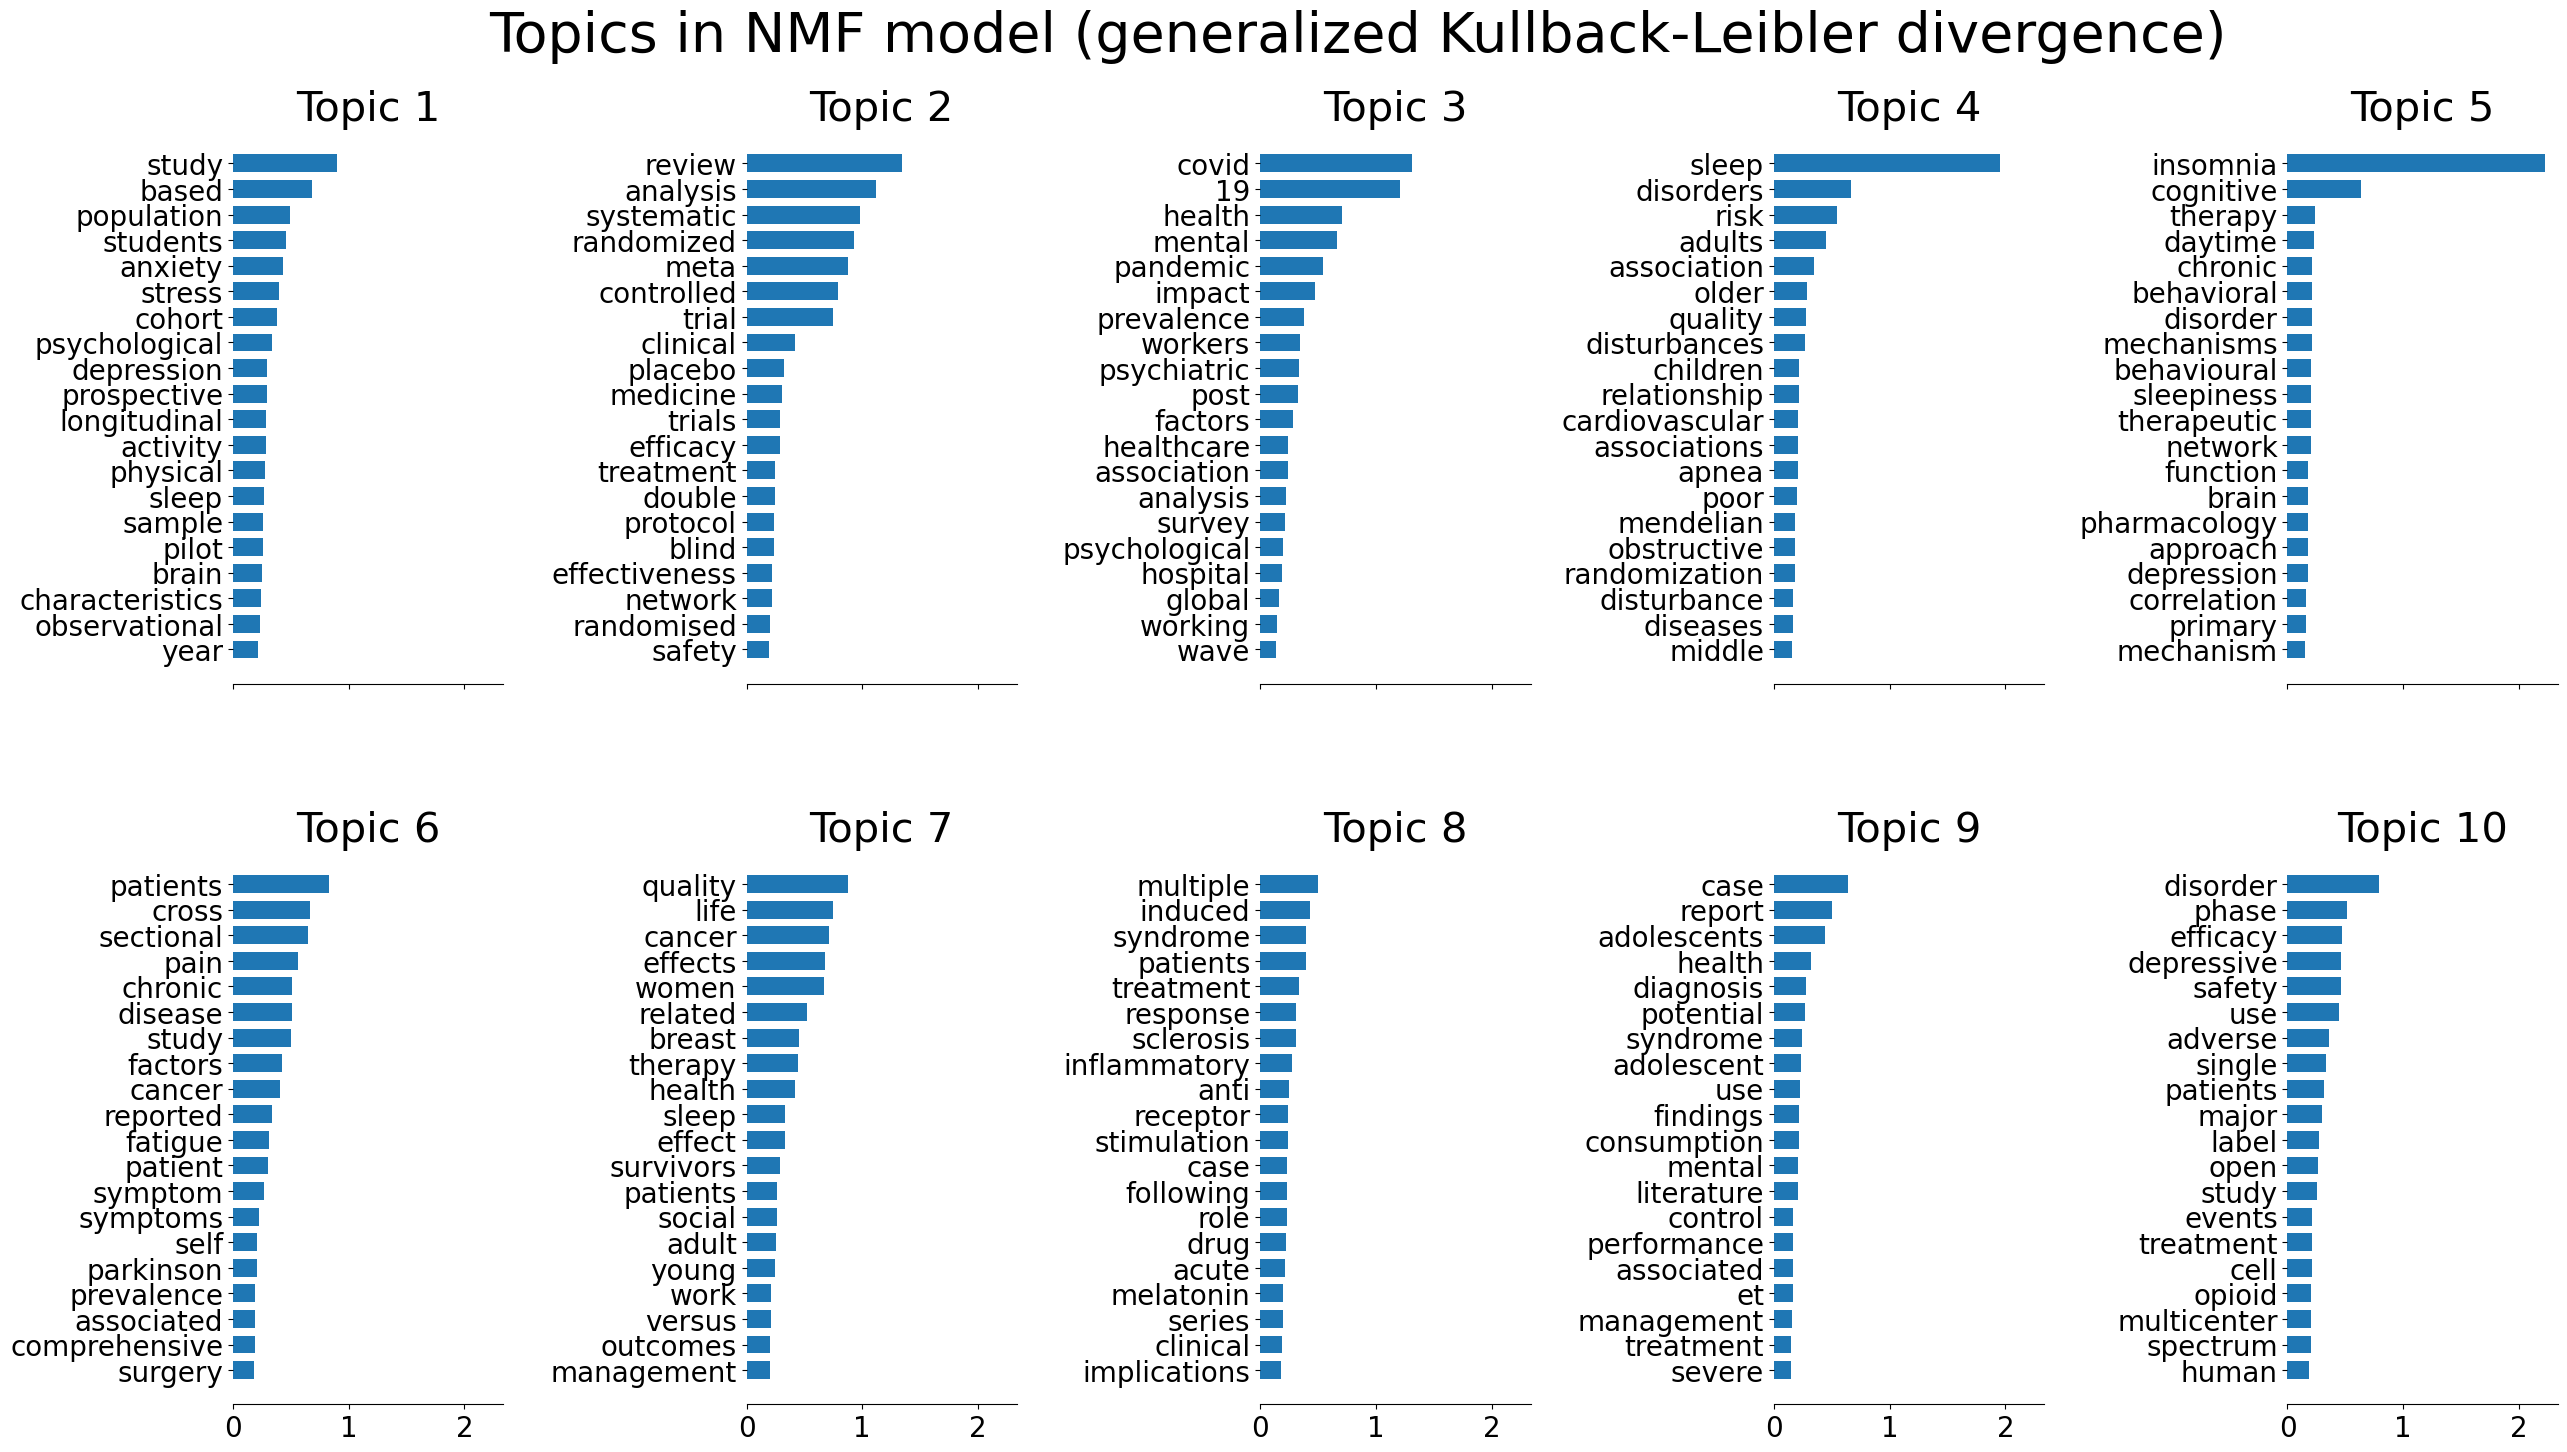

In [75]:
# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

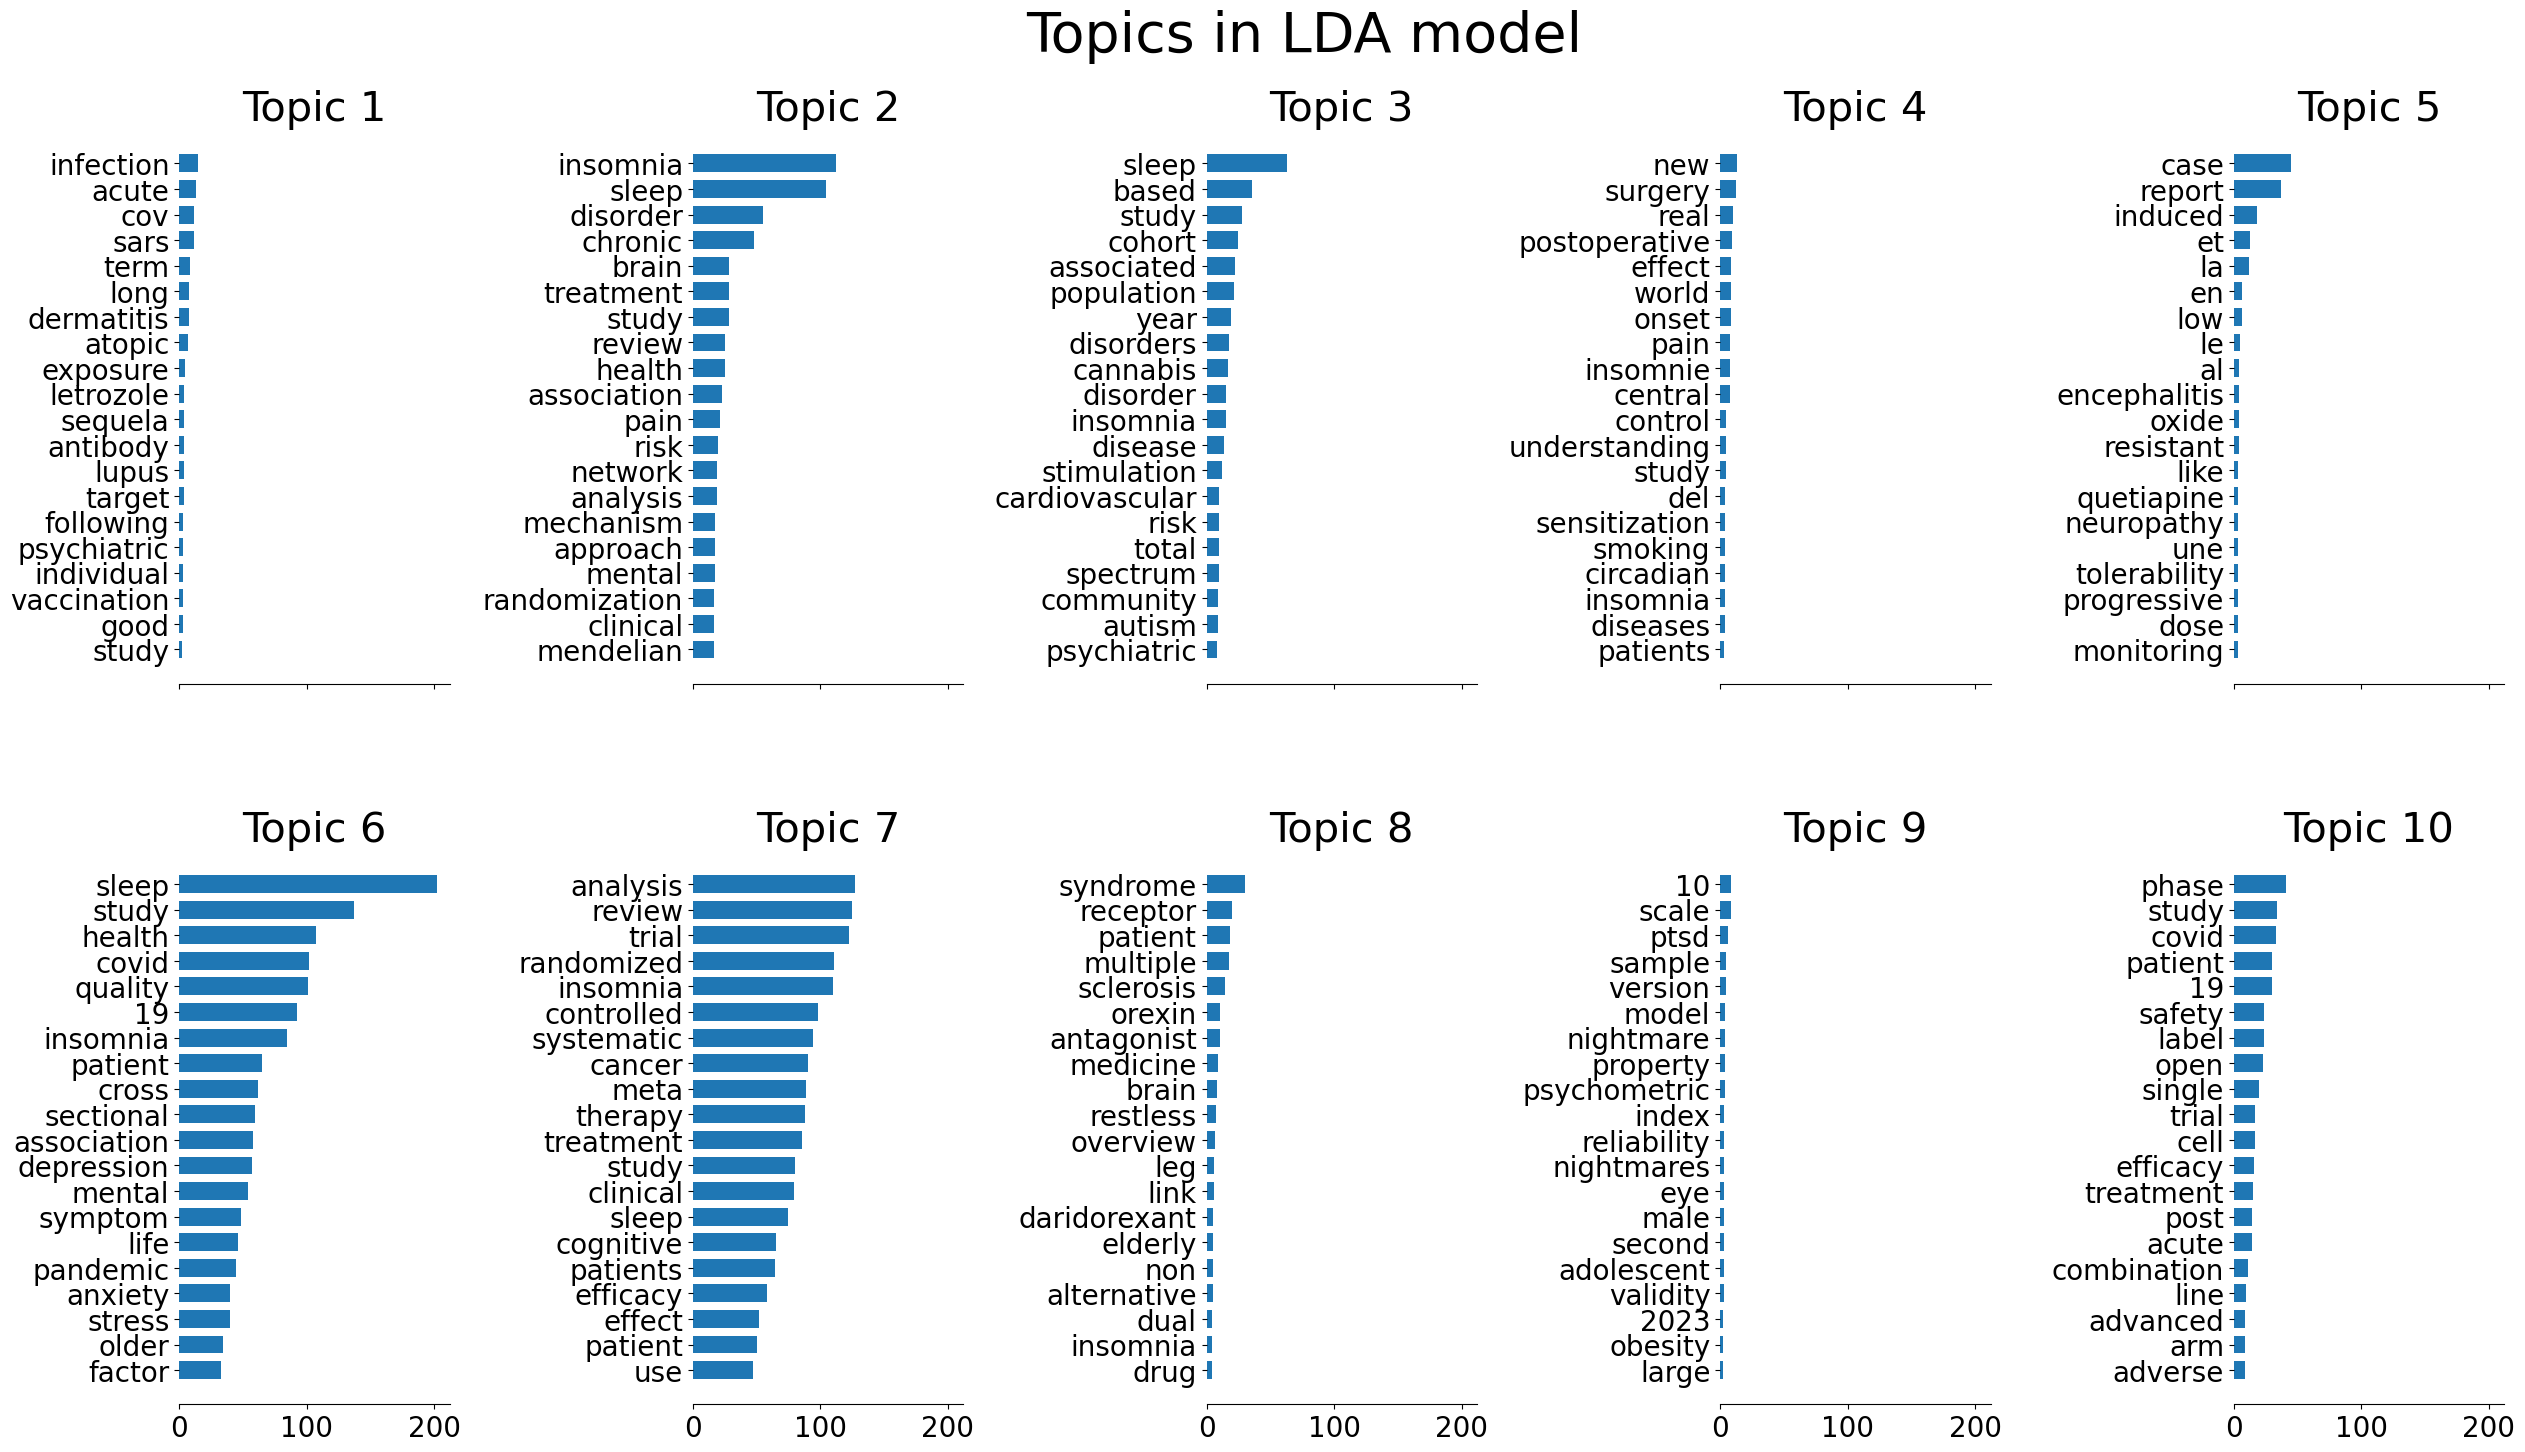

In [76]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")